# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Cuentas-teóricas-de-formación-de-imagen-de-una-red-e-difracción-con-un-sistema-4-f-(2-f_1---2-f_2)" data-toc-modified-id="Cuentas-teóricas-de-formación-de-imagen-de-una-red-e-difracción-con-un-sistema-4-f-(2-f_1---2-f_2)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cuentas teóricas de formación de imagen de una red e difracción con un sistema 4-f ($2 f_1 - 2 f_2$)</a></div><div class="lev1 toc-item"><a href="#Definición-de-variables" data-toc-modified-id="Definición-de-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Definición de variables</a></div><div class="lev2 toc-item"><a href="#Definición-de-la-red" data-toc-modified-id="Definición-de-la-red-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Definición de la red</a></div><div class="lev2 toc-item"><a href="#Definición-de-la-iluminacion" data-toc-modified-id="Definición-de-la-iluminacion-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Definición de la iluminacion</a></div>

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

%matplotlib inline

from scipy import signal

import numpy as np
import matplotlib.pyplot as plt

import sympy
from sympy import init_session
init_session(quiet=True)
from sympy import I

IPython console for SymPy 1.0 (Python 2.7.12-64-bit) (ground types: python)


 <center>**Convolucion geométrica en un $I_0$**</center>

<center>*Luis Miguel Sánchez Brea*</center>
<center>20 de mayo de 2017</center>
#  Cuentas teóricas de formación de imagen de una red e difracción con un sistema 4-f ($2 f_1 - 2 f_2$)

Para el polariscopio la formación de imagen se va a hacer con un objetivo de microscopio 20x y una lente en la camara. Vamos a ver como se forma la imagen en un sistema 4f y, por si necesitamos amplificación $2 f_1 - 2 f_2$.
Las cuentas la he hecho a mano y voy a ver si me salen aquí, sobre todo para
* ver tolerancias 
* analizar si la formación de imagen es perfecta o nos afecta el efecto de autoimágenes.

Un esquema se muestra en la siguiente figura


In [3]:
Image(url= "figures/4f-image.jpg", width=800)


Para hacerlo es necesario definir bien la forma de hacer las integrales para que se simplifique todo.



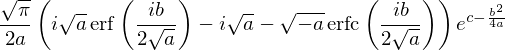

In [4]:
x = sympy.symbols('x', real=True)
a = sympy.symbols('a', real=True, negative=True)
b, c = sympy.symbols('b, c', real=True, positive=True)
integral=sympy.integrate(sympy.exp(a*x**2+b*x+c),(x,-oo,oo))
sympy.simplify(integral)


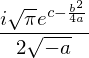

In [5]:
def integral_teorica(a,b,c):
    """
    sympy.integrate(sympy.exp(a*x**2+b*x+c),x)
    No consideramos los terminos fuera de la exponencial
    """
    resultado_integral= sympy.sqrt(sympy.pi/a)*sympy.exp(-b**2/(4*a)+c)/2
    resultado_integral
    return resultado_integral
  
#ejemplo
integral_teorica(a,b,c)

# Definición de variables

## Definición de la red
The grating is defined as 
\begin{equation}
t(x)=\sum a_{l}e^{i\,q\,l\,x}
\end{equation}

## Definición de la iluminacion
u0=1

In [7]:
al, l = sympy.symbols('a_l, l', real=True, integer=True, positive=True)
q, k = sympy.symbols('q, k', real=True, integer=True, positive=True)
x,xp = sympy.symbols('x,x_p', real=True, integer=True, positive=True)
z0,z1,z2 = sympy.symbols('z0, z1, z2', real=True, integer=True, positive=True)
f1,f2 = sympy.symbols('f_1,f_2', real=True, integer=True, positive=True)

u0,u1,u2,u3,u4,u5,u6= sympy.symbols('u_0, u_1,u_2, u_3,u_4,u_5,u_6', real=True, positive=True)

In [6]:
def propagacion(z):
    integral=sympy.exp(I*k*(x-xp)**2/(2*z)), I*k*(x-xp)**2/(2*z)
    integral=sympy.exp(I*k*(x-xp)**2/(2*z))

    return integral
propagacion(z)

In [8]:
def lente(f):
    l=sympy.exp(-I*k*x**2/(2*f))
    return l
lente(f1)

In [ ]:
#u0: despues de la red
u0=1
t=al*sympy.exp(I*q*l*xp)
u1=u0*t
u1

#primera propagacion z0
p0=propagacion(z0)
u2=u1*p0
integral=sympy.integrate(u2,(xp,-oo,oo))

NameError: name 'propagacion' is not defined

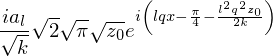

In [107]:
u2=sympy.simplify(integral).args[0][0]
u2

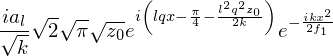

In [108]:
u3=u2*lente(f1)
u3

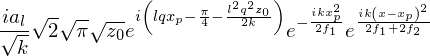

In [116]:
p1=propagacion(f1+f2)
u4=u3.subs(x,xp)*p1
u4

In [112]:
integral=sympy.integrate(u4,(xp,-oo,oo))

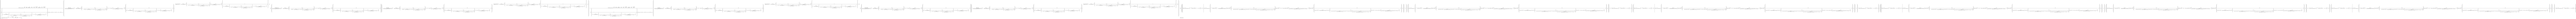

In [114]:
s

In [115]:
u4c=sympy.simplify(integral).args[0][0]
u4c

KeyboardInterrupt: 